Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j,
             0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j],
            dims=(2, 2, 2, 2, 2))
Quantum Circuit:
                               
q_0: ──────────────────────────
     ┌───┐     ┌───┐┌─┐        
q_1: ┤ H ├──■──┤ H ├┤M├────────
     └───┘┌─┴─┐└───┘└╥┘        
q_2: ─────┤ X ├──■───╫─────────
     ┌───┐└───┘┌─┴─┐ ║ ┌───┐┌─┐
q_3: ┤ H ├──■──┤ X ├─╫─┤ X ├┤M├
     └───┘┌─┴─┐└───┘ ║ └───┘└╥┘
q_4: ─────┤ X ├──────╫───────╫─
          └───┘      ║       ║ 
c: 2/════════════════╩═══════╩═
                     0       1 
Final Statevector:
Statevector([ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.70

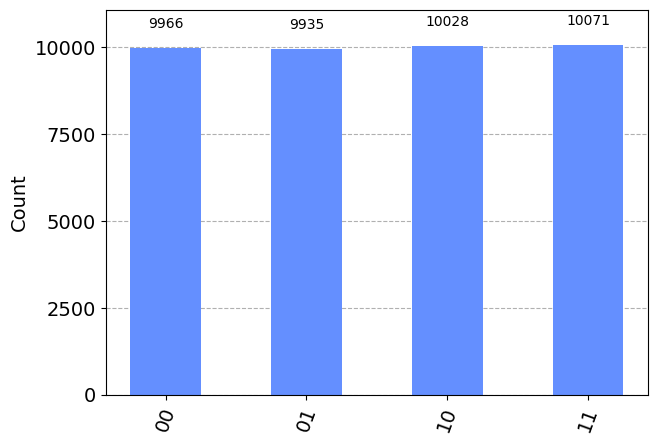

In [15]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram

# Create a quantum circuit with 4 qubits
qc = QuantumCircuit(5,2)

# Create Bell states on qubits 1 and 2, and qubits 3 and 4
qc.h(1)
qc.cx(1, 2)
qc.h(3)
qc.cx(3, 4)

# Perform a CNOT operation on qubits 2 and 3
qc.cx(2, 3)

# Perform Hadamard operation on qubit 1 and measure
qc.h(1)
qc.measure(1, 0)

# Perform Pauli-X operation on qubit 3 and measure
qc.x(3)
qc.measure(3, 1)

# Print the quantum circuit
print("Quantum Circuit:")
print(qc)

# Simulate the circuit
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()

# Plot the Bloch multivector
print("Final Statevector:")
print(statevector)
plot_bloch_multivector(statevector)

# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=40000)
result = job.result()
counts = result.get_counts(qc)

# Plot the histogram
print("Measurement Results:")
print(counts)
plot_histogram(counts)
